Carga de datos

In [1]:
import os

images_path = "images"
annotations_path = "annotations"

trainval = open(os.path.join(annotations_path, "trainval.txt")).readlines()
test = open(os.path.join(annotations_path, "test.txt")).readlines()

os.makedirs(os.path.join(images_path, "train", "cats"), exist_ok=True)
os.makedirs(os.path.join(images_path, "train", "dogs"), exist_ok=True)
os.makedirs(os.path.join(images_path, "test", "cats"), exist_ok=True)
os.makedirs(os.path.join(images_path, "test", "dogs"), exist_ok=True)

def classify_image(line, subset):
    basename = line.split(" ")[0]
    species = line.split(" ")[2]
    subfolder = "cats" if species == "1" else "dogs"
    oldpath = os.path.join(images_path, f"{basename}.jpg")
    newpath = os.path.join(images_path, subset, subfolder, f"{basename}.jpg")
    if os.path.isfile(oldpath):
        os.rename(oldpath, newpath)

for line in trainval:
    classify_image(line, "train")

for line in test:
    classify_image(line, "test")

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generador_entrenamiento = ImageDataGenerator()
datos_entrenamiento = generador_entrenamiento.flow_from_directory("images/train")
generador_test = ImageDataGenerator()
datos_test = generador_test.flow_from_directory("images/test", class_mode=None)
algunas_imagenes = next(datos_test)

Found 3680 images belonging to 2 classes.
Found 3669 images belonging to 2 classes.


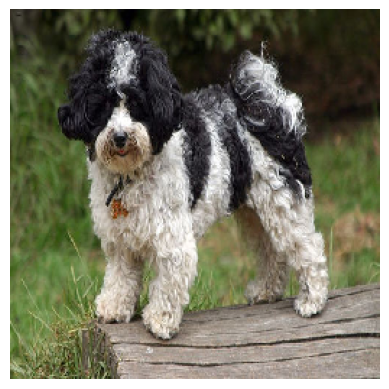

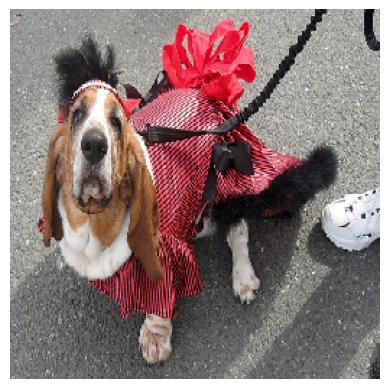

In [5]:
from matplotlib import pyplot as plt
plt.imshow(algunas_imagenes[0]/255.)
plt.axis('off')
plt.show()
plt.imshow(algunas_imagenes[1]/255.)
plt.axis('off')
plt.show()

Carga del modelo

In [6]:
from tensorflow.keras import applications
inception = applications.InceptionV3(include_top=False, input_shape=(256, 256, 3))

Ajustes del modelo

In [7]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
predictor = Sequential([
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(2, activation="softmax")
])
modelo = Sequential([inception, predictor])
modelo.compile(optimizer="adam", loss="categorical_crossentropy")

Entrenamiento

In [13]:
modelo.fit(datos_entrenamiento, epochs=20)

Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 522s 5s/step - loss: 0.0104
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 503s 4s/step - loss: 0.0466
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 497s 4s/step - loss: 0.0183
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 511s 4s/step - loss: 0.0133
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 522s 5s/step - loss: 0.0229
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 502s 4s/step - loss: 0.0445
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 521s 5s/step - loss: 0.0341
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 521s 5s/step - loss: 0.0146
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 457s 4s/step - loss: 0.0728
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 434s 4s/step - loss: 0.0188
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 426s 4s/step - loss: 0.0250
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 491s 4s/step - loss: 0.0134
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 485s 4s/step - loss: 0.0195
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 434s 4s/step - loss: 0.0196
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 44

Predicción

In [14]:
lote_test = next(datos_test)

probs = modelo.predict(lote_test)
import numpy as np
clase = np.argmax(probs, -1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


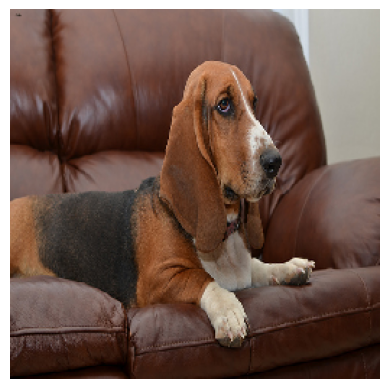

Predicción: perro


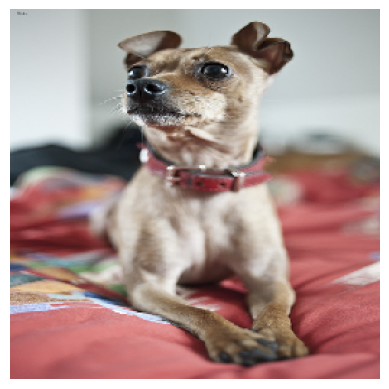

Predicción: perro


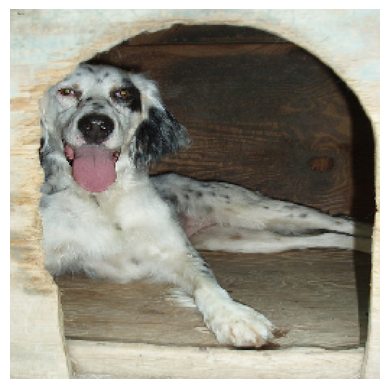

Predicción: perro


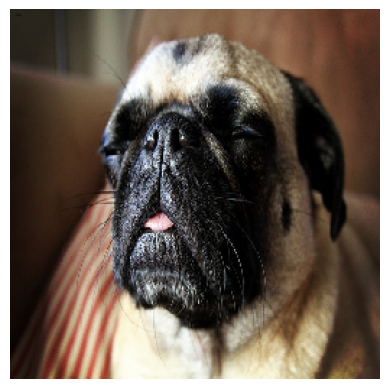

Predicción: perro


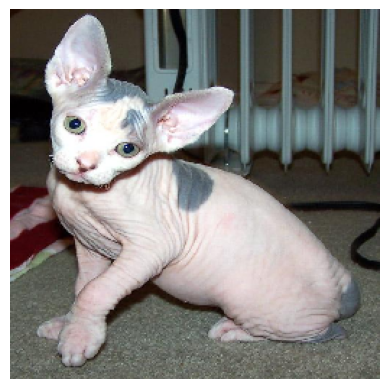

Predicción: gato


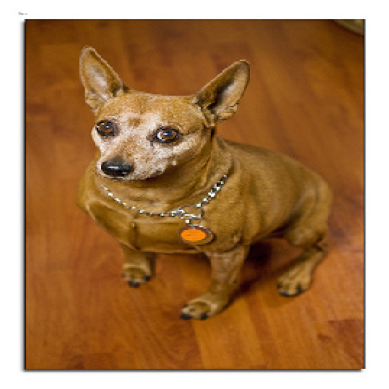

Predicción: gato


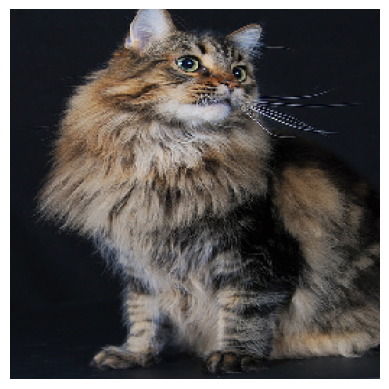

Predicción: gato


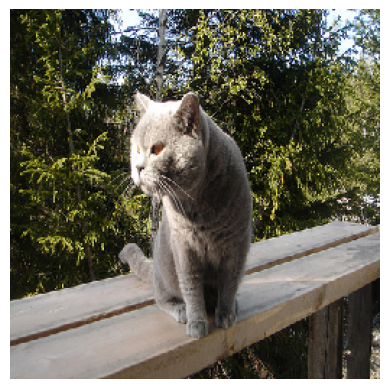

Predicción: gato


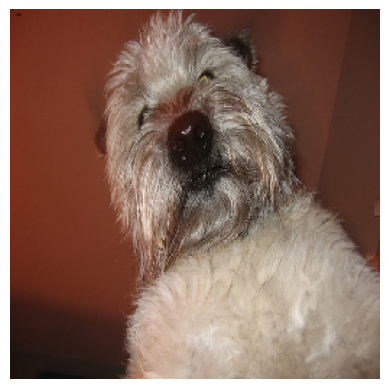

Predicción: perro


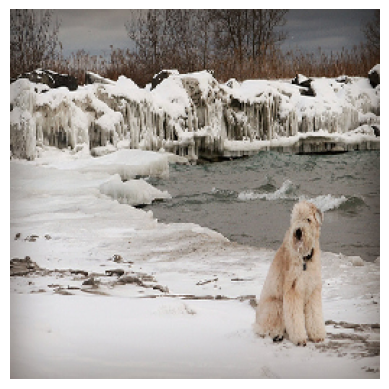

Predicción: perro


In [15]:
mostrar_imagenes = 10

for i in range(mostrar_imagenes):
    plt.imshow(lote_test[i]/255.)
    plt.axis('off')
    plt.show()
    print("Predicción:", "perro" if clase[i] else "gato")